In [1]:
from keras.models import load_model

model = load_model('model1.h5')

In [2]:

import requests
urls = ['https://img.freepik.com/free-photo/beagle-tricolor-puppy-is-posing-cute-white-braun-black-doggy-pet-is-sitting-blue-background-looks-attented-sad-studio-photoshot-concept-motion-movement-action-negative-space_155003-33947.jpg',
        'https://t4.ftcdn.net/jpg/05/18/34/87/360_F_518348789_lzG6uDayU4gRZ60PR0XVpBiuqnTHoWnV.jpg',
        'https://www.shutterstock.com/image-photo/smiling-little-puppy-light-brown-260nw-2161553111.jpg'
        ]

for index, url in enumerate(urls):
  response = requests.get(url)
  filename = 'img-test-' + str(index+1) + '.jpg'
  file = open(filename, "wb")
  file.write(response.content)
  file.close()

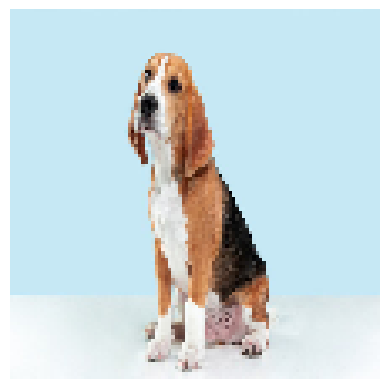

1/1 [==============================] - 0s 107ms/step
Result     :  [[1.43151537e-01 4.72388184e-03 1.84639182e-04 2.07858902e-04
  2.40359892e-04 5.61104171e-05 6.46491302e-03 8.29892874e-01
  6.13880402e-04 1.44639695e-02 5.27539845e-10 6.97864618e-13
  1.41737899e-09 5.43388147e-11 1.79445370e-09]]
Max Class  :  7
Class Name :  Poodle



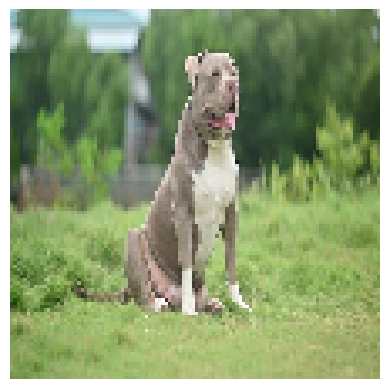

1/1 [==============================] - 0s 18ms/step
Result     :  [[1.0705979e-01 1.1837917e-01 2.9741645e-01 1.8603753e-02 1.8427246e-03
  1.9643294e-05 2.0005614e-01 2.3984611e-01 2.6774229e-03 1.4085799e-02
  5.7099319e-06 6.5167592e-07 2.1175191e-07 1.9315232e-09 6.4312462e-06]]
Max Class  :  2
Class Name :  Bulldog



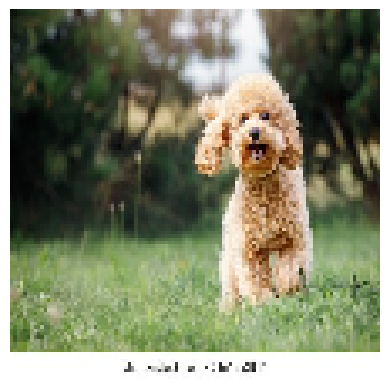

1/1 [==============================] - 0s 23ms/step
Result     :  [[2.2241077e-01 1.5537318e-02 4.2487253e-02 1.6673742e-01 6.4183615e-02
  6.8483651e-02 4.0528015e-03 3.7587816e-01 4.5372431e-05 4.0183656e-02
  7.7425115e-09 3.1760958e-09 4.6547358e-10 1.0944394e-09 1.2650812e-08]]
Max Class  :  7
Class Name :  Poodle



In [3]:
# Test Images
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

input = (110, 110)
class_names = ["Beagle", "Boxer", "Bulldog", "Dachshund", 'German_Shepherd', "Golden_Retriever", "Labrador_Retriever", "Poodle", "Rottweiler", "Yorkshire_Terrier"]
img_paths = ['img-test-1.jpg',
             'img-test-2.jpg',
             'img-test-3.jpg']

for filename in img_paths:
  img = image.load_img(filename, target_size=(input))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)

  img_batch = img_batch / 255.0

  prediction_inf = model.predict(img_batch)
  result_max_proba = prediction_inf.argmax(axis=-1)[0]
  result_class = class_names[result_max_proba]

  print('Result     : ', prediction_inf)
  print('Max Class  : ', result_max_proba)
  print('Class Name : ', result_class)
  print('')

Hasil Prediksi :

- Gambar 1, Model gagal untuk bisa memprediksi dengan tepat, seharusnya beagle bukan poodle
- Gambar 2, model berhasil untuk memprediksi dengan tepat
- Gambar 3, Model berhasil untuk memprediksi dengan tepat